In [29]:
using DataFrames, CSV, Random, PyPlot, PyCall
using Distributions
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [30]:
amount = 1000


R_0_dash = 0.022
X_vv_dash = -0.040
X_vr_dash = 0.002
X_rr_dash = 0.011
X_vvvv_dash = 0.771
Y_v_dash = -0.315
Y_r_dash = 0.083
Y_vvv_dash = -1.607
Y_vvr_dash = 0.379
Y_vrr_dash = -0.391
Y_rrr_dash = 0.008
N_v_dash = -0.137
N_r_dash = -0.049
N_vvv_dash = -0.030
N_vvr_dash = -0.294
N_vrr_dash = 0.055
N_rrr_dash = -0.013

devide = 0.1
df = DataFrame(
    u = 0.0 * ones(amount),
    v = 0.0 * ones(amount),
    r = 0.0 * ones(amount),
    R_0 = R_0_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    X_vv = X_vv_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_vr = X_vr_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_rr = X_rr_dash .+ rand(Normal(0.0, 0.12/devide), amount),
    X_vvvv = X_vvvv_dash .+ rand(Normal(0.0, 2.8/devide), amount),
    Y_v = Y_v_dash .+ rand(Normal(0.0, 0.5/devide), amount),
    Y_r = Y_r_dash .+ rand(Normal(0.0, 0.3/devide), amount),
    Y_vvv = Y_vvv_dash .+ rand(Normal(0.0, 8.0/devide), amount),
    Y_vvr = Y_vvr_dash .+ rand(Normal(0.0, 3.5/devide), amount),
    Y_vrr = Y_vrr_dash .+ rand(Normal(0.0, 1.5/devide), amount),
    Y_rrr = Y_rrr_dash .+ rand(Normal(0.0, 0.16/devide), amount),
    N_v = N_v_dash .+ rand(Normal(0.0, 0.2/devide), amount),
    N_r = N_r_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    N_vvv = N_vvv_dash .+ rand(Normal(0.0, 0.9/devide), amount),
    N_vvr = N_vvr_dash .+ rand(Normal(0.0, 1.0/devide), amount),
    N_vrr = N_vrr_dash .+ rand(Normal(0.0, 0.6/devide), amount),
    N_rrr = N_rrr_dash .+ rand(Normal(0.0, 0.06/devide), amount),
)
devide = 80
df2 = DataFrame(
    u = 0.0 * ones(amount),
    v = 0.0 * ones(amount),
    r = 0.0 * ones(amount),
    R_0 = R_0_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    X_vv = X_vv_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_vr = X_vr_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_rr = X_rr_dash .+ rand(Normal(0.0, 0.12/devide), amount),
    X_vvvv = X_vvvv_dash .+ rand(Normal(0.0, 2.8/devide), amount),
    Y_v = Y_v_dash .+ rand(Normal(0.0, 0.5/devide), amount),
    Y_r = Y_r_dash .+ rand(Normal(0.0, 0.3/devide), amount),
    Y_vvv = Y_vvv_dash .+ rand(Normal(0.0, 8.0/devide), amount),
    Y_vvr = Y_vvr_dash .+ rand(Normal(0.0, 3.5/devide), amount),
    Y_vrr = Y_vrr_dash .+ rand(Normal(0.0, 1.5/devide), amount),
    Y_rrr = Y_rrr_dash .+ rand(Normal(0.0, 0.16/devide), amount),
    N_v = N_v_dash .+ rand(Normal(0.0, 0.2/devide), amount),
    N_r = N_r_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    N_vvv = N_vvv_dash .+ rand(Normal(0.0, 0.9/devide), amount),
    N_vvr = N_vvr_dash .+ rand(Normal(0.0, 1.0/devide), amount),
    N_vrr = N_vrr_dash .+ rand(Normal(0.0, 0.6/devide), amount),
    N_rrr = N_rrr_dash .+ rand(Normal(0.0, 0.06/devide), amount),
)
devide = 60
df3 = DataFrame(
    u = 0.0 * ones(amount),
    v = 0.0 * ones(amount),
    r = 0.0 * ones(amount),
    R_0 = R_0_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    X_vv = X_vv_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_vr = X_vr_dash .+ rand(Normal(0.0, 0.4/devide), amount),
    X_rr = X_rr_dash .+ rand(Normal(0.0, 0.12/devide), amount),
    X_vvvv = X_vvvv_dash .+ rand(Normal(0.0, 2.8/devide), amount),
    Y_v = Y_v_dash .+ rand(Normal(0.0, 0.5/devide), amount),
    Y_r = Y_r_dash .+ rand(Normal(0.0, 0.3/devide), amount),
    Y_vvv = Y_vvv_dash .+ rand(Normal(0.0, 8.0/devide), amount),
    Y_vvr = Y_vvr_dash .+ rand(Normal(0.0, 3.5/devide), amount),
    Y_vrr = Y_vrr_dash .+ rand(Normal(0.0, 1.5/devide), amount),
    Y_rrr = Y_rrr_dash .+ rand(Normal(0.0, 0.16/devide), amount),
    N_v = N_v_dash .+ rand(Normal(0.0, 0.2/devide), amount),
    N_r = N_r_dash .+ rand(Normal(0.0, 0.1/devide), amount),
    N_vvv = N_vvv_dash .+ rand(Normal(0.0, 0.9/devide), amount),
    N_vvr = N_vvr_dash .+ rand(Normal(0.0, 1.0/devide), amount),
    N_vrr = N_vrr_dash .+ rand(Normal(0.0, 0.6/devide), amount),
    N_rrr = N_rrr_dash .+ rand(Normal(0.0, 0.06/devide), amount),
)
# CSV.write("Distributions80.csv", df)

Row,u,v,r,R_0,X_vv,X_vr,X_rr,X_vvvv,Y_v,Y_r,Y_vvv,Y_vvr,Y_vrr,Y_rrr,N_v,N_r,N_vvv,N_vvr,N_vrr,N_rrr
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0240899,-0.0420971,0.000281935,0.0129486,0.783523,-0.311055,0.0780163,-1.45829,0.358634,-0.362738,0.00590555,-0.133744,-0.0493219,-0.0183027,-0.312595,0.0632353,-0.0140026
2,0.0,0.0,0.0,0.0220507,-0.0382527,0.00543239,0.0116377,0.785593,-0.318428,0.0828334,-1.42154,0.360672,-0.426703,0.00600701,-0.134161,-0.0493312,-0.0348559,-0.290567,0.0592916,-0.0122927
3,0.0,0.0,0.0,0.0193793,-0.0495463,0.0090255,0.00854922,0.70015,-0.319107,0.0797883,-1.56879,0.417793,-0.370778,0.00675543,-0.134189,-0.0488118,-0.0337811,-0.278981,0.0399163,-0.0128409
4,0.0,0.0,0.0,0.0218,-0.0399081,0.00368454,0.00923888,0.77131,-0.303916,0.081612,-1.44826,0.482935,-0.394203,0.0126158,-0.137966,-0.050903,-0.0396448,-0.30433,0.0611271,-0.0143693
5,0.0,0.0,0.0,0.0225679,-0.0445022,0.00579207,0.0137411,0.789241,-0.312977,0.0843842,-1.5867,0.387774,-0.334269,0.0107398,-0.142843,-0.0500329,-0.0494533,-0.295983,0.0399041,-0.0138784
6,0.0,0.0,0.0,0.0222677,-0.0340509,-0.000841729,0.00967491,0.782266,-0.329431,0.0874343,-1.57542,0.367822,-0.396021,0.00716169,-0.133679,-0.0480452,-0.0314915,-0.275082,0.0572352,-0.012007
7,0.0,0.0,0.0,0.0241424,-0.0382845,0.00556962,0.00990425,0.722875,-0.318669,0.0756446,-1.50728,0.429913,-0.364668,0.0102073,-0.131942,-0.0497278,-0.0391193,-0.305232,0.050186,-0.0131671
8,0.0,0.0,0.0,0.0204383,-0.0444942,0.0101586,0.0113192,0.767721,-0.321838,0.0784243,-1.40948,0.385962,-0.408188,0.0111676,-0.137142,-0.0490631,-0.0374182,-0.290936,0.0634536,-0.011695
9,0.0,0.0,0.0,0.0237386,-0.0296189,0.00911425,0.0129891,0.788857,-0.320613,0.088337,-1.60647,0.391053,-0.386422,0.00328293,-0.14595,-0.0504944,-0.0182414,-0.326609,0.0561118,-0.0115158


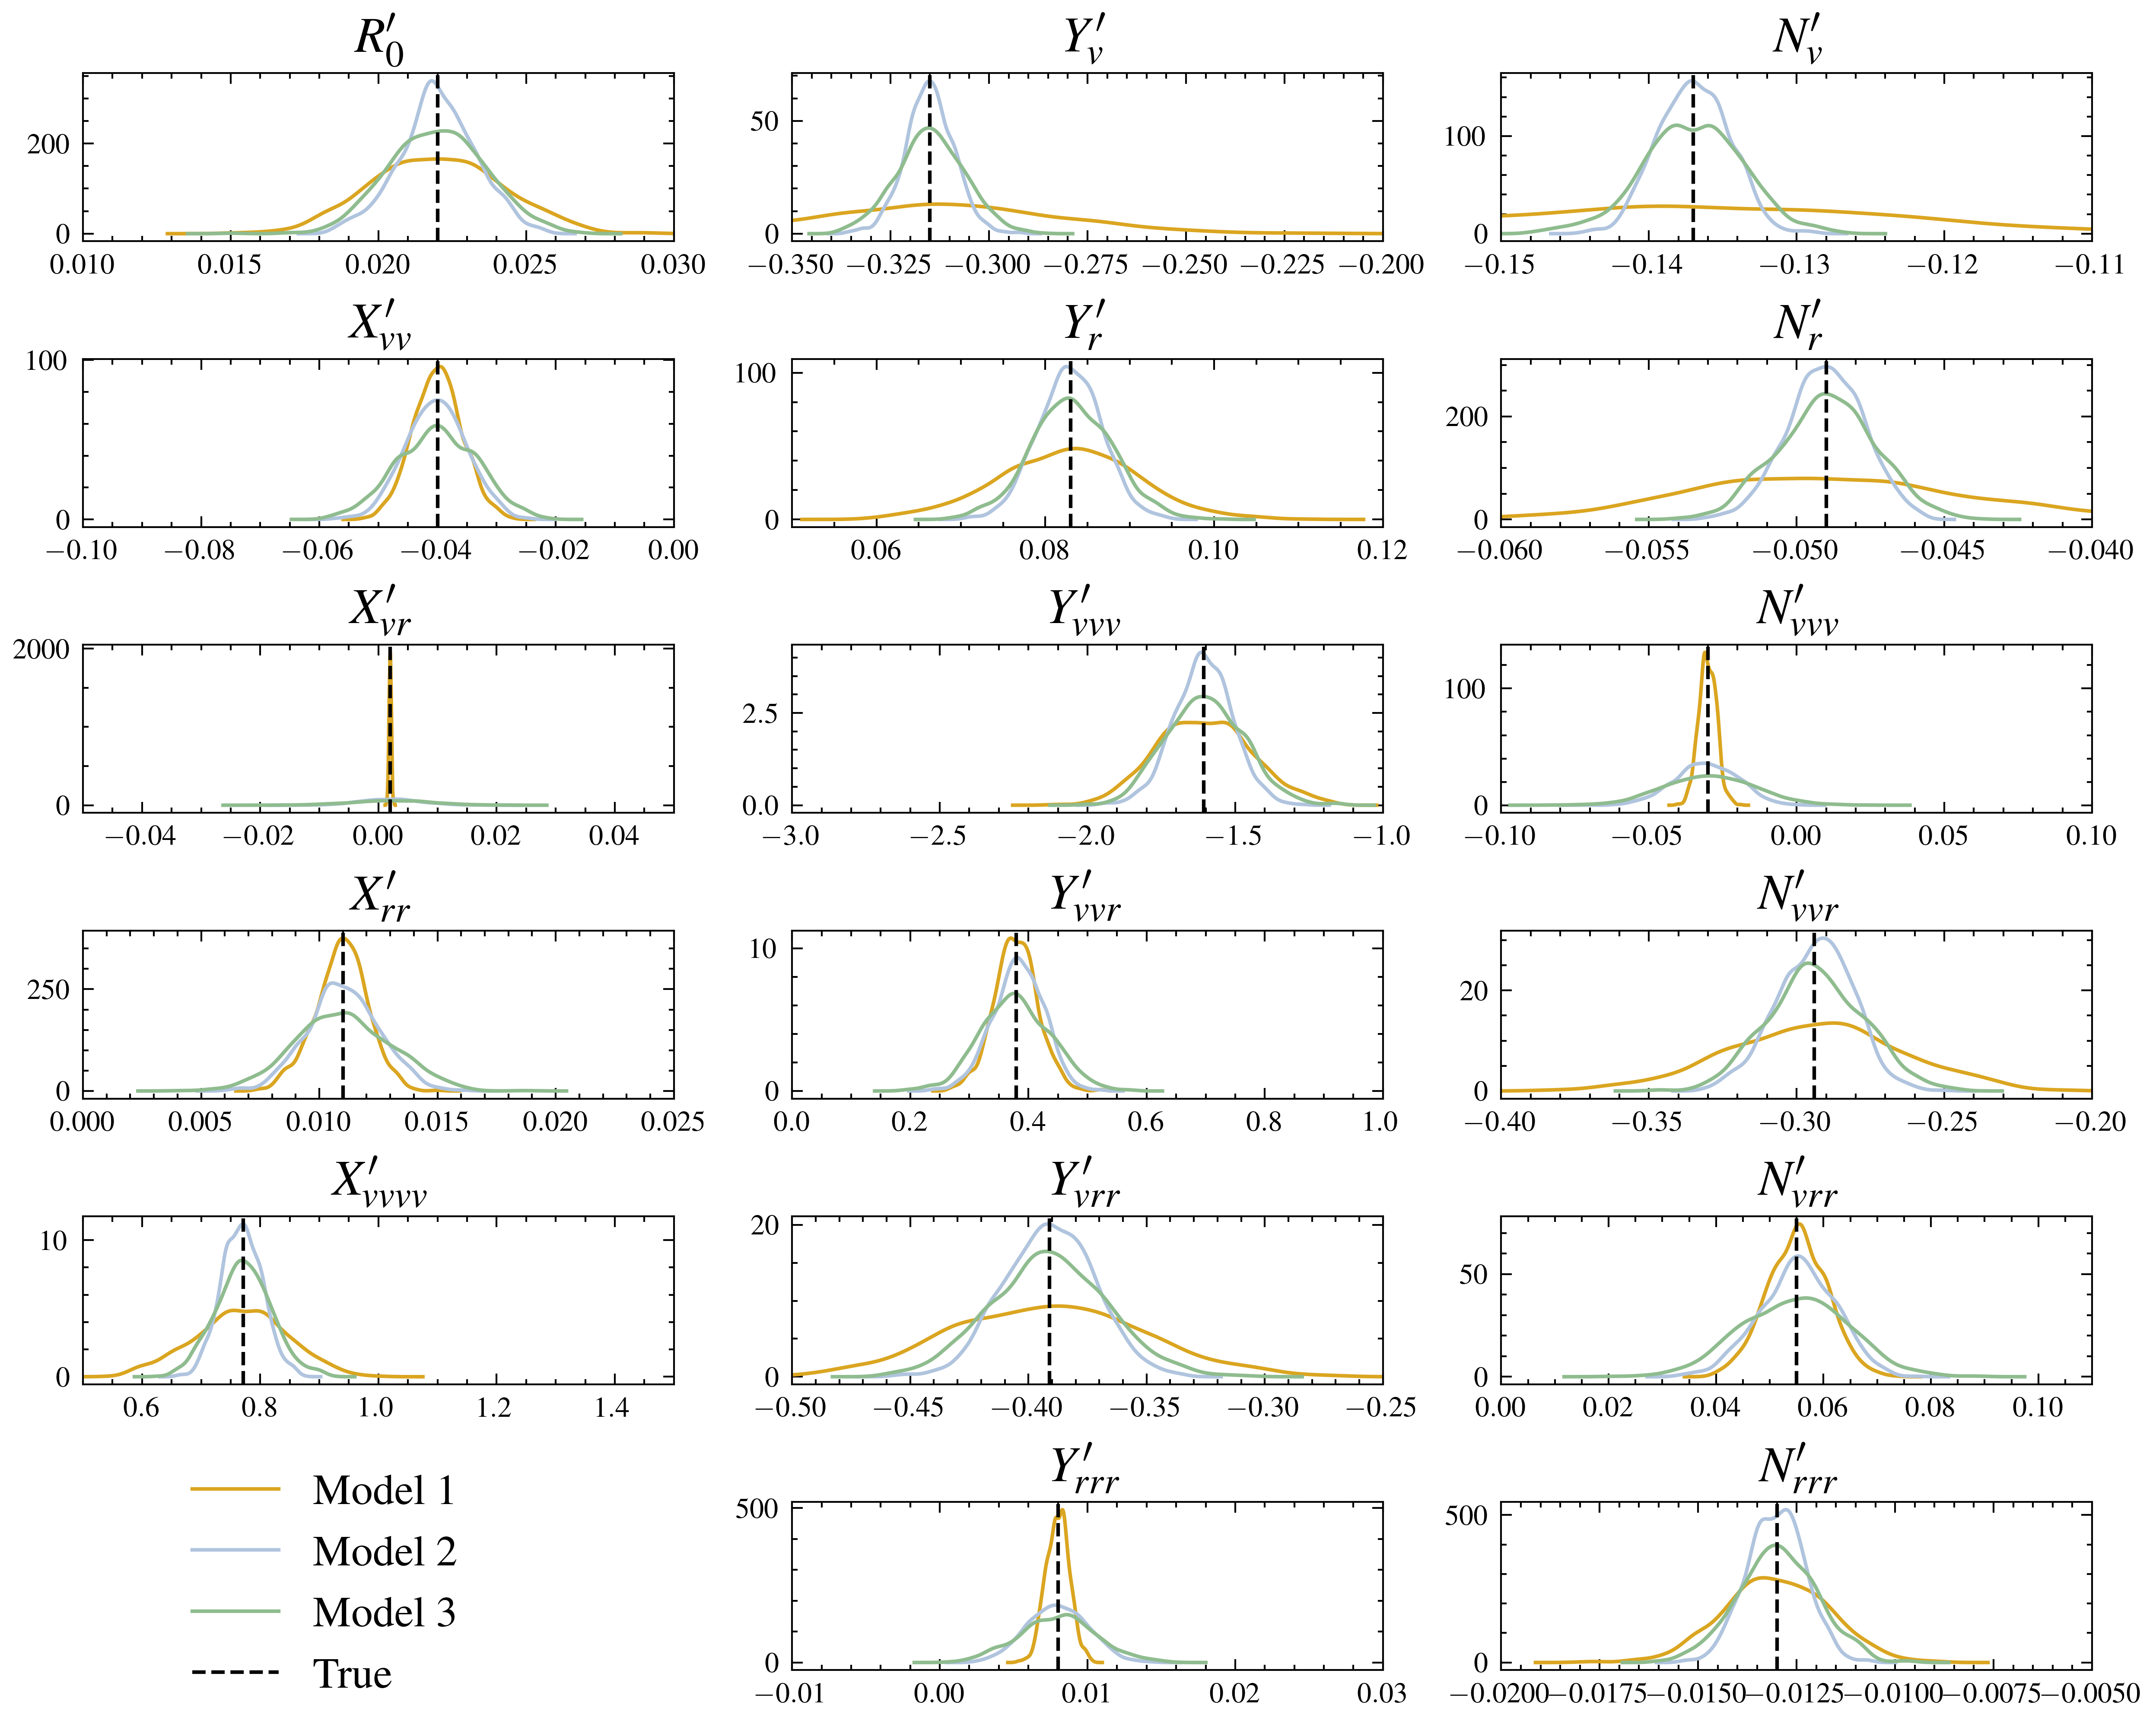

In [33]:
plt.style.use(["science", "ieee"])

# データの読み込み
data = df
data2 = df2
data3 = df3
fig = plt.figure(figsize=(10, 8))

start_num = 1
end_num = 1000
# R_0_dash
R_0_posterior = data.R_0[start_num:end_num]
R_0_posterior2 = data2.R_0[start_num:end_num]
R_0_posterior3 = data3.R_0[start_num:end_num]
kde_result = kde(R_0_posterior)
kde_result2 = kde(R_0_posterior2)
kde_result3 = kde(R_0_posterior3)
ax = fig.add_subplot(6, 3, 1)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.022, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"R_0^{\prime}",fontsize=14)
ax.set_xlim(0.01, 0.03)

# X_vv_dash
X_vv_posterior = data.X_vv[start_num:end_num]
X_vv_posterior2 = data2.X_vv[start_num:end_num]
X_vv_posterior3 = data3.X_vv[start_num:end_num]
kde_result = kde(X_vv_posterior)
kde_result2 = kde(X_vv_posterior2)
kde_result3 = kde(X_vv_posterior3)
ax = fig.add_subplot(6, 3, 4)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.040, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vv}^{\prime}",fontsize=14)

ax.set_xlim(-0.1, 0.0)

# X_vr_dash
X_vr_posterior = data.X_vr[start_num:end_num]
X_vr_posterior2 = data2.X_vr[start_num:end_num]
X_vr_posterior3 = data3.X_vr[start_num:end_num]
kde_result = kde(X_vr_posterior)
kde_result2 = kde(X_vr_posterior2)
kde_result3 = kde(X_vr_posterior3)
ax = fig.add_subplot(6, 3, 7)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.002, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vr}^{\prime}",fontsize=14)

ax.set_xlim(-0.05, 0.05)

# X_rr_dash
X_rr_posterior = data.X_rr[start_num:end_num]
X_rr_posterior2 = data2.X_rr[start_num:end_num]
X_rr_posterior3 = data3.X_rr[start_num:end_num]
kde_result = kde(X_rr_posterior)
kde_result2 = kde(X_rr_posterior2)
kde_result3 = kde(X_rr_posterior3)
ax = fig.add_subplot(6, 3, 10)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.011, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{rr}^{\prime}",fontsize=14)

ax.set_xlim(0.00, 0.025)

# X_vvvv_dash
X_vvvv_posterior = data.X_vvvv[start_num:end_num]
X_vvvv_posterior2 = data2.X_vvvv[start_num:end_num]
X_vvvv_posterior3 = data3.X_vvvv[start_num:end_num]
kde_result = kde(X_vvvv_posterior)
kde_result2 = kde(X_vvvv_posterior2)
kde_result3 = kde(X_vvvv_posterior3)
ax = fig.add_subplot(6, 3, 13)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.771, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vvvv}^{\prime}",fontsize=14)

ax.set_xlim(0.5, 1.5)

# Y_v_dash
Y_v_posterior = data.Y_v[start_num:end_num]
Y_v_posterior2 = data2.Y_v[start_num:end_num]
Y_v_posterior3 = data3.Y_v[start_num:end_num]
kde_result = kde(Y_v_posterior)
kde_result2 = kde(Y_v_posterior2)
kde_result3 = kde(Y_v_posterior3)
ax = fig.add_subplot(6, 3, 2)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.315, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"Y_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.35, -0.2)

# Y_r_dash
Y_r_posterior = data.Y_r[start_num:end_num]
Y_r_posterior2 = data2.Y_r[start_num:end_num]
Y_r_posterior3 = data3.Y_r[start_num:end_num]
kde_result = kde(Y_r_posterior)
kde_result2 = kde(Y_r_posterior2)
kde_result3 = kde(Y_r_posterior3)
ax = fig.add_subplot(6, 3, 5)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.083, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{r}^{\prime}",fontsize=14)

ax.set_xlim(0.05, 0.12)

# Y_vvv_dash
Y_vvv_posterior = data.Y_vvv[start_num:end_num]
Y_vvv_posterior2 = data2.Y_vvv[start_num:end_num]
Y_vvv_posterior3 = data3.Y_vvv[start_num:end_num]
kde_result = kde(Y_vvv_posterior)
kde_result2 = kde(Y_vvv_posterior2)
kde_result3 = kde(Y_vvv_posterior3)
ax = fig.add_subplot(6, 3, 8)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-1.607, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvv}^{\prime}",fontsize=14)

ax.set_xlim(-3, -1)

# Y_vvr_dash
Y_vvr_posterior = data.Y_vvr[start_num:end_num]
Y_vvr_posterior2 = data2.Y_vvr[start_num:end_num]
Y_vvr_posterior3 = data3.Y_vvr[start_num:end_num]
kde_result = kde(Y_vvr_posterior)
kde_result2 = kde(Y_vvr_posterior2)
kde_result3 = kde(Y_vvr_posterior3)
ax = fig.add_subplot(6, 3, 11)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.379, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvr}^{\prime}",fontsize=14)

ax.set_xlim(0.0, 1.00)

# Y_vrr_dash
Y_vrr_posterior = data.Y_vrr[start_num:end_num]
Y_vrr_posterior2 = data2.Y_vrr[start_num:end_num]
Y_vrr_posterior3 = data3.Y_vrr[start_num:end_num]
kde_result = kde(Y_vrr_posterior)
kde_result2 = kde(Y_vrr_posterior2)
kde_result3 = kde(Y_vrr_posterior3)
ax = fig.add_subplot(6, 3, 14)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.391, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vrr}^{\prime}",fontsize=14)

ax.set_xlim(-0.5, -0.25)

# Y_rrr_dash
Y_rrr_posterior = data.Y_rrr[start_num:end_num]
Y_rrr_posterior2 = data2.Y_rrr[start_num:end_num]
Y_rrr_posterior3 = data3.Y_rrr[start_num:end_num]
kde_result = kde(Y_rrr_posterior)
kde_result2 = kde(Y_rrr_posterior2)
kde_result3 = kde(Y_rrr_posterior3)
ax = fig.add_subplot(6, 3, 17)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.008, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{rrr}^{\prime}",fontsize=14)

ax.set_xlim(-0.01, 0.03)

# N_v_dash
N_v_posterior = data.N_v[start_num:end_num]
N_v_posterior2 = data2.N_v[start_num:end_num]
N_v_posterior3 = data3.N_v[start_num:end_num]
kde_result = kde(N_v_posterior)
kde_result2 = kde(N_v_posterior2)
kde_result3 = kde(N_v_posterior3)
ax = fig.add_subplot(6, 3, 3)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.137, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"N_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.15, -0.11)

# N_r_dash
N_r_posterior = data.N_r[start_num:end_num]
N_r_posterior2 = data2.N_r[start_num:end_num]
N_r_posterior3 = data3.N_r[start_num:end_num]
kde_result = kde(N_r_posterior)
kde_result2 = kde(N_r_posterior2)
kde_result3 = kde(N_r_posterior3)
ax = fig.add_subplot(6, 3, 6)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.049, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"N_{r}^{\prime}",fontsize=14)

ax.set_xlim(-0.06, -0.04)

# N_vvv_dash 
N_vvv_posterior = data.N_vvv[start_num:end_num]
N_vvv_posterior2 = data2.N_vvv[start_num:end_num]
N_vvv_posterior3 = data3.N_vvv[start_num:end_num]
kde_result = kde(N_vvv_posterior) 
kde_result2 = kde(N_vvv_posterior2)
kde_result3 = kde(N_vvv_posterior3)
ax = fig.add_subplot(6, 3, 9) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.030, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvv}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.1, 0.1) 
# N_vvr_dash 
N_vvr_posterior = data.N_vvr[start_num:end_num]
N_vvr_posterior2 = data2.N_vvr[start_num:end_num]
N_vvr_posterior3 = data3.N_vvr[start_num:end_num]
kde_result = kde(N_vvr_posterior) 
kde_result2 = kde(N_vvr_posterior2)
kde_result3 = kde(N_vvr_posterior3)
ax = fig.add_subplot(6, 3, 12) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.294, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvr}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.4, -0.2) 
# N_vrr_dash 
N_vrr_posterior = data.N_vrr[start_num:end_num]
N_vrr_posterior2 = data2.N_vrr[start_num:end_num]
N_vrr_posterior3 = data3.N_vrr[start_num:end_num]
kde_result = kde(N_vrr_posterior) 
kde_result2 = kde(N_vrr_posterior2)
kde_result3 = kde(N_vrr_posterior3)
ax = fig.add_subplot(6, 3, 15) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.055, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vrr}^{\prime}",fontsize=14) 
 
ax.set_xlim(0.0, 0.11)
# N_rrr_dash 
N_rrr_posterior = data.N_rrr[start_num:end_num]
N_rrr_posterior2 = data2.N_rrr[start_num:end_num]
N_rrr_posterior3 = data3.N_rrr[start_num:end_num]
kde_result = kde(N_rrr_posterior) 
kde_result2 = kde(N_rrr_posterior2)
kde_result3 = kde(N_rrr_posterior3)
ax = fig.add_subplot(6, 3, 18) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod",label="Model~1", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue",label="Model~2", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen",label="Model~3", linewidth=1.0)
ax.axvline(x=-0.013, c="k", linestyle="--", label="True", linewidth=1.0) 
ax.set_title(L"N_{rrr}^{\prime}",fontsize=14) 
ax.set_xlim(-0.02, -0.005) 

ax.legend(bbox_to_anchor=(-1.7, 1.4), fontsize=12)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
display(fig)

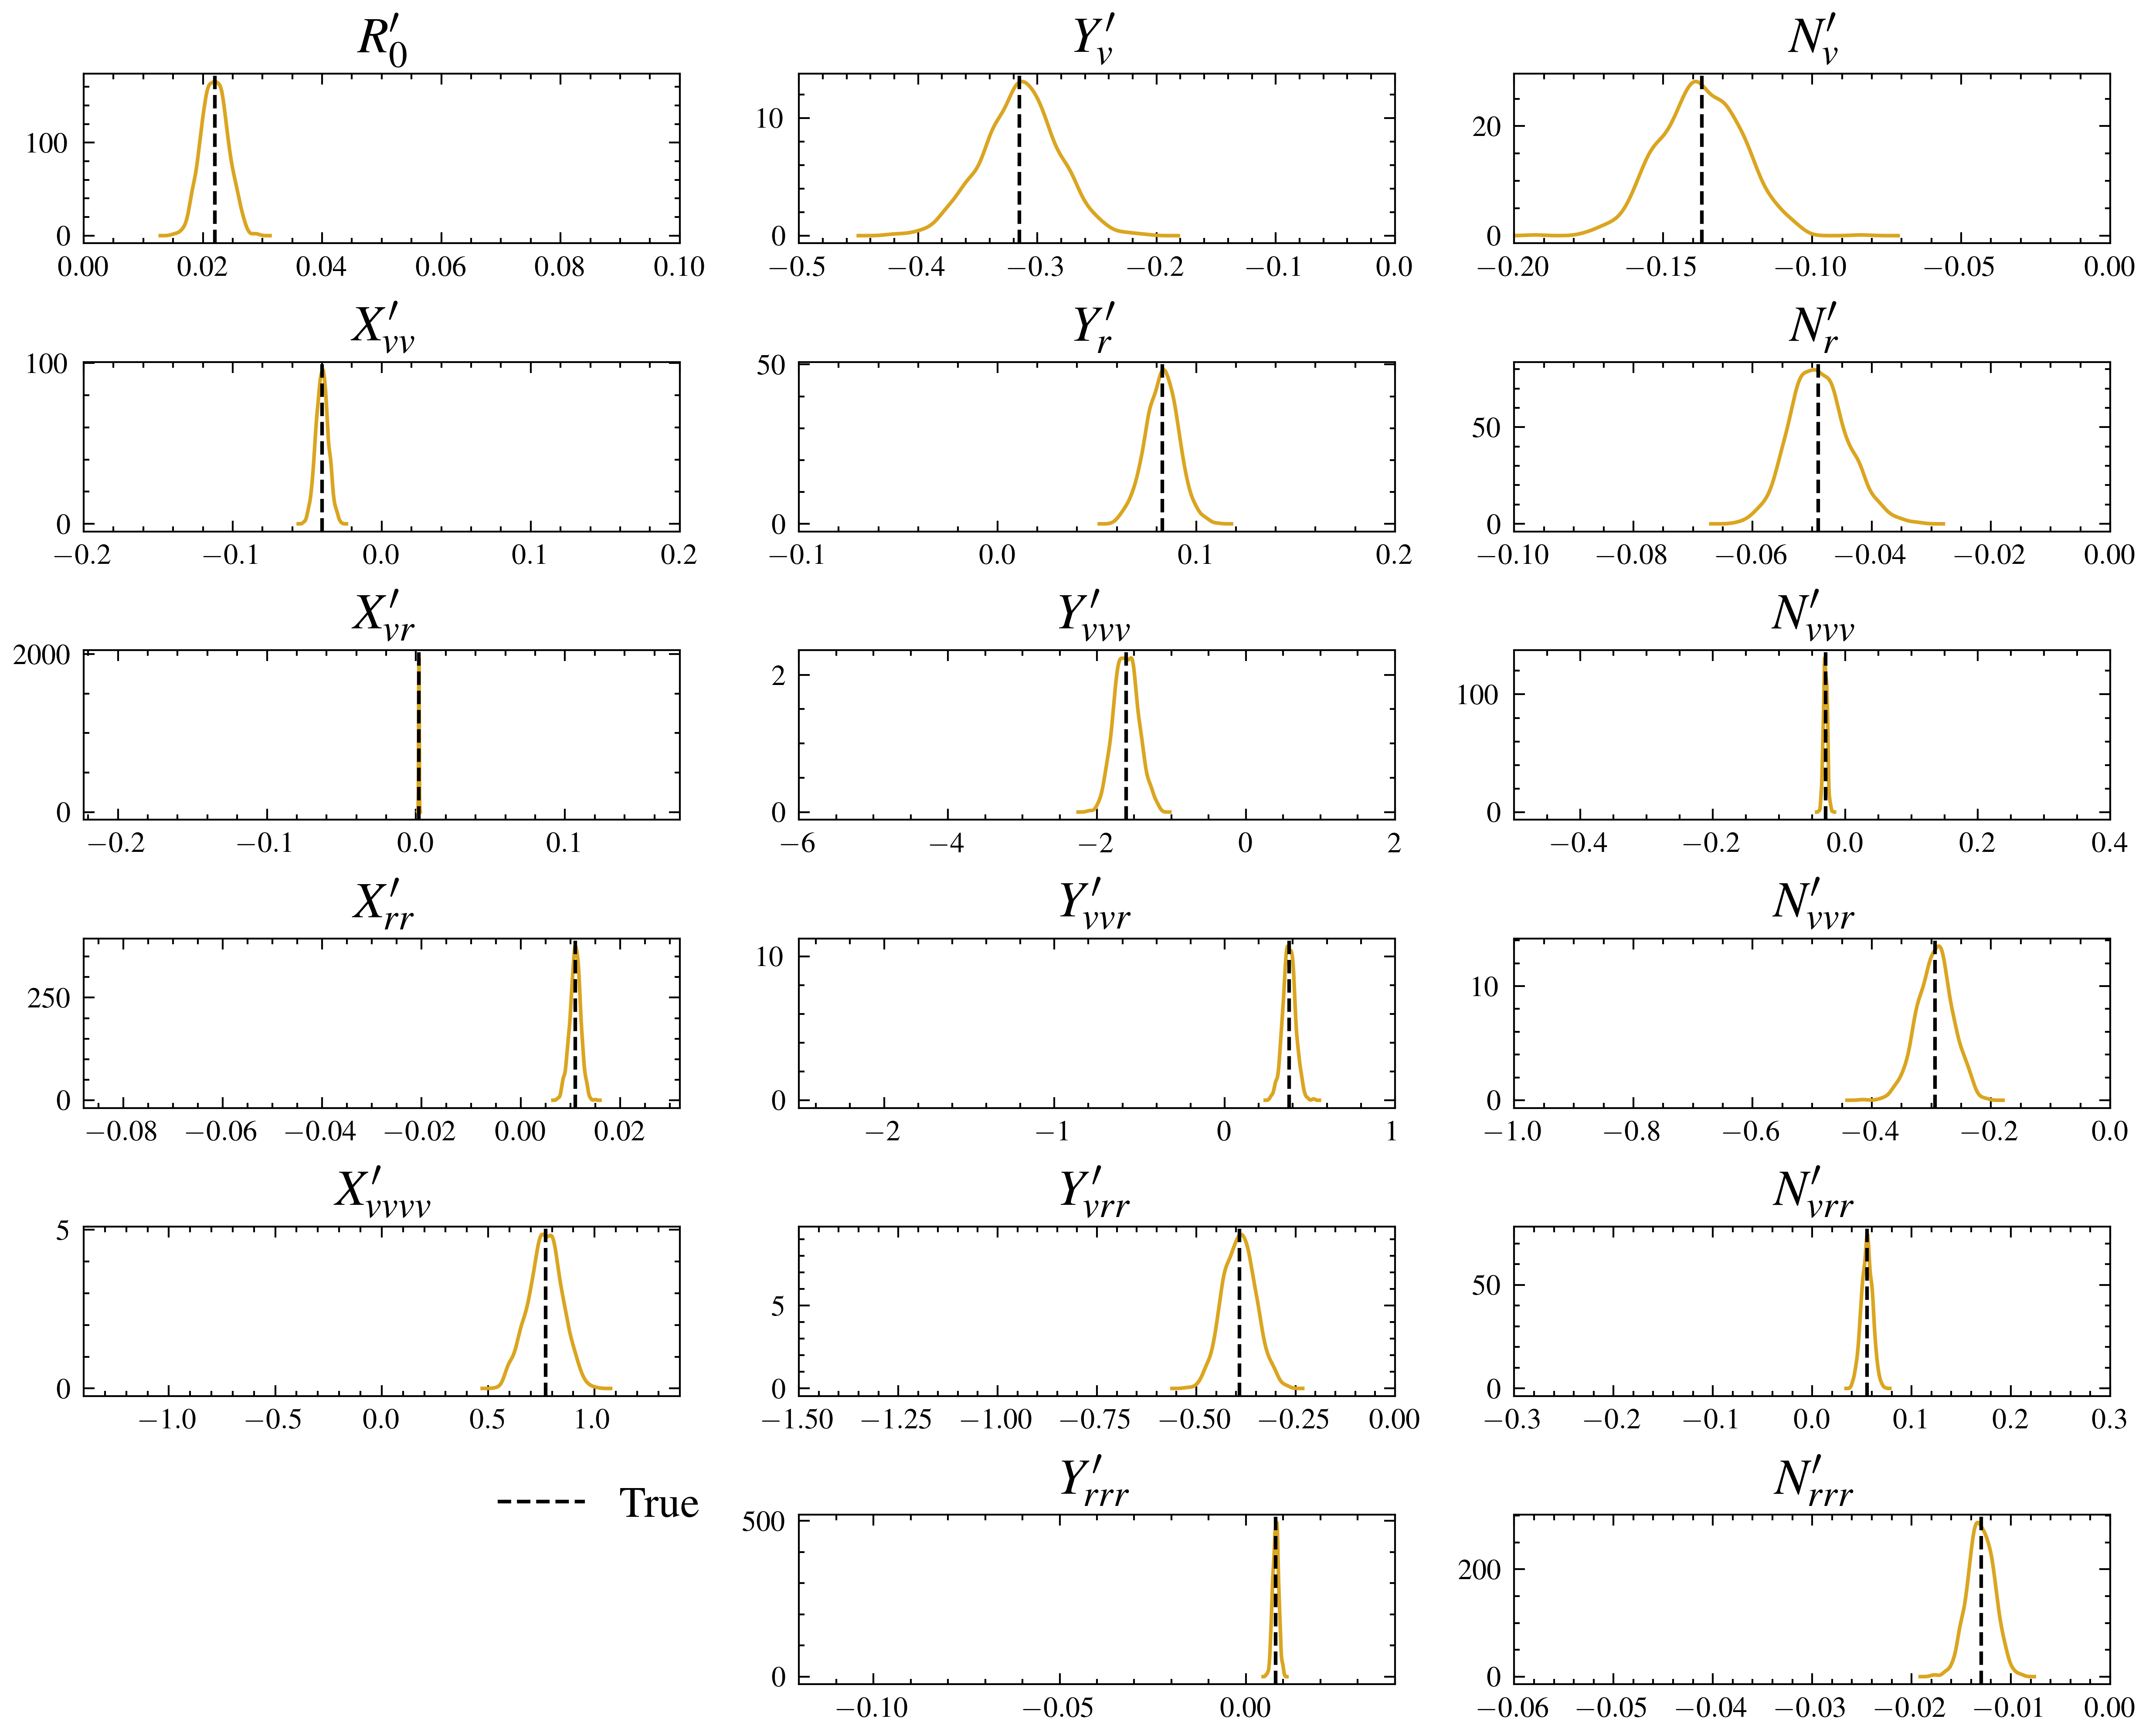

In [32]:
plt.style.use(["science", "ieee"])

# データの読み込み
data = df

fig = plt.figure(figsize=(10, 8))

start_num = 1
end_num = amount
# R_0_dash
R_0_posterior = data.R_0[start_num:end_num]

kde_result = kde(R_0_posterior)
ax = fig.add_subplot(6, 3, 1)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)

ax.axvline(x=0.022, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"R_0^{\prime}",fontsize=14)
ax.set_xlim(0.00, 0.10)

# X_vv_dash
X_vv_posterior = data.X_vv[start_num:end_num]

kde_result = kde(X_vv_posterior)

ax = fig.add_subplot(6, 3, 4)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.040, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vv}^{\prime}",fontsize=14)

ax.set_xlim(-0.20, 0.20)

# X_vr_dash
X_vr_posterior = data.X_vr[start_num:end_num]
kde_result = kde(X_vr_posterior)
ax = fig.add_subplot(6, 3, 7)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=0.002, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vr}^{\prime}",fontsize=14)

ax.set_xlim(-0.223, 0.177)

# X_rr_dash
X_rr_posterior = data.X_rr[start_num:end_num]
kde_result = kde(X_rr_posterior)
ax = fig.add_subplot(6, 3, 10)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=0.011, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{rr}^{\prime}",fontsize=14)

ax.set_xlim(-0.088, 0.032)

# X_vvvv_dash
X_vvvv_posterior = data.X_vvvv[start_num:end_num]
kde_result = kde(X_vvvv_posterior)
ax = fig.add_subplot(6, 3, 13)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=0.771, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vvvv}^{\prime}",fontsize=14)

ax.set_xlim(-1.40, 1.40)

# Y_v_dash
Y_v_posterior = data.Y_v[start_num:end_num]
kde_result = kde(Y_v_posterior)
ax = fig.add_subplot(6, 3, 2)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.315, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"Y_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.50, 0.00)

# Y_r_dash
Y_r_posterior = data.Y_r[start_num:end_num]
kde_result = kde(Y_r_posterior)
ax = fig.add_subplot(6, 3, 5)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)

ax.axvline(x=0.083, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{r}^{\prime}",fontsize=14)

ax.set_xlim(-0.10, 0.20)

# Y_vvv_dash
Y_vvv_posterior = data.Y_vvv[start_num:end_num]

kde_result = kde(Y_vvv_posterior)
ax = fig.add_subplot(6, 3, 8)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)

ax.axvline(x=-1.607, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvv}^{\prime}",fontsize=14)

ax.set_xlim(-6.00, 2.00)

# Y_vvr_dash
Y_vvr_posterior = data.Y_vvr[start_num:end_num]

kde_result = kde(Y_vvr_posterior)

ax = fig.add_subplot(6, 3, 11)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=0.379, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvr}^{\prime}",fontsize=14)

ax.set_xlim(-2.50, 1.00)

# Y_vrr_dash
Y_vrr_posterior = data.Y_vrr[start_num:end_num]
kde_result = kde(Y_vrr_posterior)
ax = fig.add_subplot(6, 3, 14)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.391, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vrr}^{\prime}",fontsize=14)

ax.set_xlim(-1.50, 0.00)

# Y_rrr_dash
Y_rrr_posterior = data.Y_rrr[start_num:end_num]
kde_result = kde(Y_rrr_posterior)
ax = fig.add_subplot(6, 3, 17)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=0.008, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{rrr}^{\prime}",fontsize=14)

ax.set_xlim(-0.12, 0.04)

# N_v_dash
N_v_posterior = data.N_v[start_num:end_num]
kde_result = kde(N_v_posterior)
ax = fig.add_subplot(6, 3, 3)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.137, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"N_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.20, 0.00)

# N_r_dash
N_r_posterior = data.N_r[start_num:end_num]
kde_result = kde(N_r_posterior)
ax = fig.add_subplot(6, 3, 6)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.049, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"N_{r}^{\prime}",fontsize=14)

ax.set_xlim(-0.10, 0.00)

# N_vvv_dash 
N_vvv_posterior = data.N_vvv[start_num:end_num]
kde_result = kde(N_vvv_posterior) 
ax = fig.add_subplot(6, 3, 9) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.axvline(x=-0.030, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvv}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.50, 0.40) 
# N_vvr_dash 
N_vvr_posterior = data.N_vvr[start_num:end_num]
kde_result = kde(N_vvr_posterior) 
ax = fig.add_subplot(6, 3, 12) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.axvline(x=-0.294, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvr}^{\prime}",fontsize=14) 
 
ax.set_xlim(-1.00, 0.00) 
# N_vrr_dash 
N_vrr_posterior = data.N_vrr[start_num:end_num]
kde_result = kde(N_vrr_posterior) 
ax = fig.add_subplot(6, 3, 15) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.axvline(x=0.055, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vrr}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.30, 0.30)
# N_rrr_dash 
N_rrr_posterior = data.N_rrr[start_num:end_num]
kde_result = kde(N_rrr_posterior) 
ax = fig.add_subplot(6, 3, 18) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.axvline(x=-0.013, c="k", linestyle="--", label="True", linewidth=1.0) 
ax.set_title(L"N_{rrr}^{\prime}",fontsize=14) 
ax.set_xlim(-0.06, 0.00) 

ax.legend(bbox_to_anchor=(-1.3, 1.4), fontsize=12)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
display(fig)